# Introduction
- Predicting taxi trip prices is essential for both passengers and service providers to ensure fair and transparent pricing. its a regression problem.
- This project focuses on using machine learning techniques to predict taxi fare prices based on factors such as trip distance, time of day, and passenger count etc.

- By leveraging data-driven insights, this project aims to develop a robust pricing model that improves fare estimations, enhances customer satisfaction, and optimizes revenue management for taxi services.

# Import The Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

# Display The DataFrame

In [ ]:
df=pd.read_csv('/content/taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [ ]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
df.tail()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090
999,22.85,Morning,Weekend,3.0,Medium,Clear,4.34,NaN,0.23,29.69,45.4437


In [ ]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [ ]:
df.dtypes

,0
Trip_Distance_km,float64
Time_of_Day,object
Day_of_Week,object
Passenger_Count,float64
Traffic_Conditions,object
Weather,object
Base_Fare,float64
Per_Km_Rate,float64
Per_Minute_Rate,float64
Trip_Duration_Minutes,float64


In [ ]:
df.isna().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
taxi_data_info=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
# Drop the rows wchich contain missing value in Trip Price column [otherwise the target wont be valid]
df.dropna(subset=['Trip_Price'],inplace=True)

In [ ]:
df.isna().sum()

,0
Trip_Distance_km,50
Time_of_Day,49
Day_of_Week,46
Passenger_Count,48
Traffic_Conditions,50
Weather,46
Base_Fare,44
Per_Km_Rate,44
Per_Minute_Rate,49
Trip_Duration_Minutes,46


In [ ]:
# df

# Check The Unique Values For Filling The Missing Values


In [ ]:
df['Trip_Distance_km'].unique()

array([ 19.35      ,  36.87      ,  30.33      ,          nan,
         8.64      ,   3.85      ,  43.44      ,  35.7       ,
        41.79      ,  11.4       ,   9.91      ,   9.99      ,
        15.91      ,  26.71      ,  22.17      ,  15.27      ,
        30.98      ,   7.84      , 105.94355004,  18.95      ,
        23.35      ,  39.47      ,  10.78      , 138.09832791,
        30.03      ,   3.28      ,  30.77      ,   9.36      ,
        47.5       ,  48.32      ,  40.61      ,  15.93      ,
         5.79      ,  34.53      ,  22.57      ,   6.98      ,
        25.26      ,   2.69      ,  45.56      ,  13.68      ,
        33.46      ,  16.27      ,  26.48      ,  27.79      ,
        10.06      ,  48.51      ,  38.98      ,  47.04      ,
        44.85      ,  30.3       ,  46.17      ,   5.34      ,
        10.6       ,   3.22      ,  16.94      ,  20.05      ,
        14.3       ,  41.61      ,  18.48      , 146.06704716,
        27.59      ,   7.91      ,  40.31      ,   4.65

In [ ]:
df['Time_of_Day'].unique()

array(['Morning', 'Evening', 'Afternoon', 'Night', nan], dtype=object)

In [ ]:
df['Day_of_Week'].unique()

array(['Weekday', 'Weekend', nan], dtype=object)

In [ ]:
df['Passenger_Count'].unique()

array([ 3.,  1.,  4.,  2., nan])

In [ ]:
df['Passenger_Count'].value_counts()

,count
Passenger_Count,
3.0,237
2.0,232
1.0,224
4.0,210


<Axes: xlabel='Passenger_Count', ylabel='Count'>

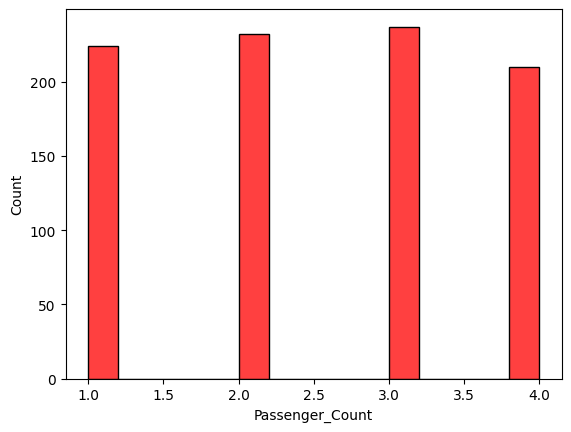

In [ ]:
sns.histplot(df['Passenger_Count'],color='r')

In [ ]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [ ]:
df['Traffic_Conditions'].value_counts()

,count
Traffic_Conditions,
Low,374
Medium,355
High,172


<Axes: xlabel='Traffic_Conditions', ylabel='Count'>

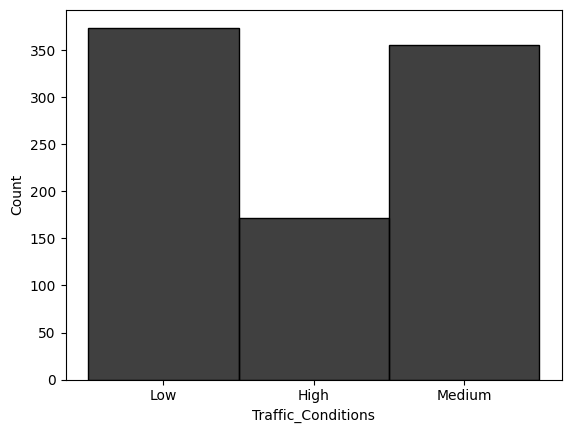

In [ ]:
sns.histplot(df['Traffic_Conditions'],color='k')

In [ ]:
df['Weather'].unique()

array(['Clear', nan, 'Rain', 'Snow'], dtype=object)

In [ ]:
df_weather=df['Weather'].value_counts()
df_weather

,count
Weather,
Clear,634
Rain,216
Snow,55


Text(0.5, 1.0, 'Pie chart of Weather count')

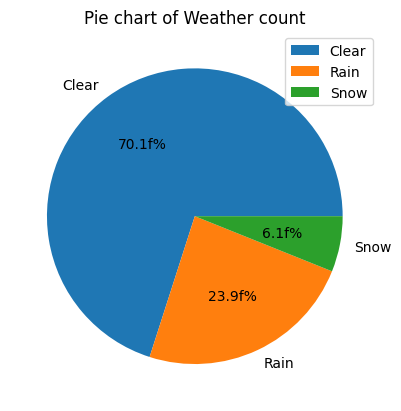

In [ ]:
plt.pie(df_weather,labels=df_weather.index,autopct='%1.01ff%%')
plt.legend(loc='upper right')
plt.title('Pie chart of Weather count')

In [ ]:
df['Base_Fare'].unique()

array([3.56, 2.7 , 3.48, 2.93, 2.55, 3.51, 2.97, 3.39, 2.4 , 4.6 , 4.12,
       2.32, 4.33, 4.42, 4.3 , 2.34, 3.93, 4.5 , 3.73, 3.94, 3.38, 3.59,
        nan, 3.92, 2.24, 3.31, 2.88, 3.64, 4.39, 2.49, 2.31, 2.44, 4.63,
       3.58, 3.4 , 3.95, 3.88, 2.23, 2.15, 2.77, 2.41, 3.16, 4.83, 3.83,
       4.13, 4.21, 2.83, 3.02, 4.99, 2.79, 2.84, 4.79, 2.07, 4.09, 4.18,
       4.51, 4.92, 4.93, 2.2 , 4.47, 2.39, 4.95, 4.74, 3.32, 2.12, 3.09,
       4.48, 4.1 , 2.17, 3.28, 3.41, 3.43, 3.07, 4.05, 3.99, 4.15, 2.8 ,
       2.95, 2.38, 3.97, 3.79, 4.61, 3.35, 4.01, 4.46, 2.73, 3.26, 4.52,
       3.65, 2.58, 4.73, 4.28, 4.53, 3.03, 2.27, 4.27, 3.75, 2.56, 3.76,
       2.05, 3.72, 2.98, 3.05, 2.82, 2.08, 3.74, 4.23, 4.03, 2.62, 3.06,
       4.58, 3.89, 4.44, 3.85, 4.34, 4.11, 4.24, 4.55, 2.86, 2.1 , 2.71,
       2.64, 2.43, 3.5 , 2.47, 3.78, 4.26, 3.34, 3.22, 3.69, 2.76, 4.75,
       4.69, 4.72, 2.51, 4.9 , 4.84, 2.9 , 2.91, 3.27, 2.42, 2.59, 2.29,
       4.77, 3.61, 3.37, 4.67, 3.71, 4.97, 4.08, 4.

In [ ]:
df['Per_Km_Rate'].unique()

array([0.8 , 1.21, 0.51, 0.63, 1.71, 1.66, 1.87, 1.52, 0.58, 1.77,  nan,
       1.26, 0.85, 1.59, 1.97, 0.73, 0.84, 0.82, 1.69, 0.78, 0.6 , 0.54,
       1.75, 1.05, 1.76, 1.33, 1.85, 0.61, 0.88, 1.5 , 1.83, 1.41, 1.95,
       0.9 , 1.25, 0.72, 1.16, 1.  , 1.28, 1.38, 1.64, 1.57, 1.63, 1.93,
       0.86, 0.99, 1.37, 1.03, 1.55, 1.34, 1.08, 1.13, 0.62, 1.82, 1.56,
       1.88, 0.91, 1.35, 1.91, 1.61, 1.12, 0.57, 0.79, 1.18, 0.95, 1.78,
       0.68, 1.3 , 1.39, 0.69, 1.31, 1.9 , 1.8 , 1.65, 0.87, 0.55, 0.65,
       1.06, 0.67, 1.11, 1.73, 0.76, 1.54, 0.71, 1.29, 1.46, 1.01, 1.86,
       1.17, 1.24, 1.84, 1.53, 1.79, 0.98, 0.77, 0.7 , 0.94, 1.36, 1.02,
       1.62, 0.59, 1.45, 1.48, 0.96, 0.52, 1.32, 0.83, 1.7 , 1.49, 1.07,
       1.19, 1.89, 1.74, 1.14, 0.74, 1.92, 1.22, 1.99, 0.93, 0.5 , 2.  ,
       0.92, 1.81, 0.75, 1.98, 0.97, 1.1 , 1.2 , 1.94, 1.15, 1.96, 1.72,
       1.27, 1.43, 1.4 , 1.67, 0.53, 1.44, 1.09, 0.81, 1.04, 0.56, 1.47,
       0.89, 1.42, 0.64, 1.51, 1.68, 1.23, 1.58, 0.

In [ ]:
df['Per_Minute_Rate'].unique()

array([0.32, 0.15, 0.48,  nan, 0.23, 0.47, 0.43, 0.11, 0.34, 0.21, 0.2 ,
       0.41, 0.12, 0.25, 0.3 , 0.39, 0.24, 0.35, 0.33, 0.36, 0.13, 0.44,
       0.38, 0.42, 0.26, 0.18, 0.5 , 0.17, 0.29, 0.28, 0.31, 0.37, 0.46,
       0.16, 0.4 , 0.1 , 0.27, 0.49, 0.45, 0.14, 0.22, 0.19])

In [ ]:
df['Trip_Duration_Minutes'].unique()

array([ 53.82,  37.27, 116.81,  22.64,  89.33,   5.05,    nan,  26.34,
        86.95,  84.12,  41.72,  34.  , 114.93, 111.18,  57.59,  57.02,
        53.8 ,  23.03,  54.04,  66.8 ,   7.59,  56.07,  94.86,  83.21,
        78.04, 109.6 ,   7.07,  95.55,  67.25,  42.25,  20.67, 107.07,
        59.14, 105.98,  72.37,  82.53,  97.49,  80.8 ,  50.78,  64.07,
        97.35,  47.97,  49.63,  16.  , 110.18,  15.47,  79.54,  52.52,
        51.65,  83.15,  12.72,  73.28,  93.78, 100.24,  24.61, 108.2 ,
       106.41,  60.81,  67.33, 110.69, 108.49,  56.54,  36.56,  50.21,
        49.59,  37.99,  35.89, 104.02,  13.03,  82.93,  24.87,  44.62,
        12.08,  36.05,  93.37, 106.78,  30.48,  58.31,  59.09, 105.46,
        92.72,  64.  ,  82.14, 102.45,   6.1 ,  51.33, 109.33,  67.43,
        65.91,  44.99,  80.37,  53.11,  87.13, 104.04,  22.79,  56.93,
        51.92,  84.06,  33.73,  78.63,  53.09, 109.77, 119.21,  17.2 ,
        31.8 , 114.29, 115.21,  16.24,   6.72,  23.53, 119.54,  25.7 ,
      

In [ ]:
df['Per_Km_Rate'].unique()

array([0.8 , 1.21, 0.51, 0.63, 1.71, 1.66, 1.87, 1.52, 0.58, 1.77,  nan,
       1.26, 0.85, 1.59, 1.97, 0.73, 0.84, 0.82, 1.69, 0.78, 0.6 , 0.54,
       1.75, 1.05, 1.76, 1.33, 1.85, 0.61, 0.88, 1.5 , 1.83, 1.41, 1.95,
       0.9 , 1.25, 0.72, 1.16, 1.  , 1.28, 1.38, 1.64, 1.57, 1.63, 1.93,
       0.86, 0.99, 1.37, 1.03, 1.55, 1.34, 1.08, 1.13, 0.62, 1.82, 1.56,
       1.88, 0.91, 1.35, 1.91, 1.61, 1.12, 0.57, 0.79, 1.18, 0.95, 1.78,
       0.68, 1.3 , 1.39, 0.69, 1.31, 1.9 , 1.8 , 1.65, 0.87, 0.55, 0.65,
       1.06, 0.67, 1.11, 1.73, 0.76, 1.54, 0.71, 1.29, 1.46, 1.01, 1.86,
       1.17, 1.24, 1.84, 1.53, 1.79, 0.98, 0.77, 0.7 , 0.94, 1.36, 1.02,
       1.62, 0.59, 1.45, 1.48, 0.96, 0.52, 1.32, 0.83, 1.7 , 1.49, 1.07,
       1.19, 1.89, 1.74, 1.14, 0.74, 1.92, 1.22, 1.99, 0.93, 0.5 , 2.  ,
       0.92, 1.81, 0.75, 1.98, 0.97, 1.1 , 1.2 , 1.94, 1.15, 1.96, 1.72,
       1.27, 1.43, 1.4 , 1.67, 0.53, 1.44, 1.09, 0.81, 1.04, 0.56, 1.47,
       0.89, 1.42, 0.64, 1.51, 1.68, 1.23, 1.58, 0.

In [ ]:
df['Trip_Distance_km']=df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean())
df['Time_of_Day']=df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Day_of_Week']=df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df['Passenger_Count']=df['Passenger_Count'].fillna(df['Passenger_Count'].mode()[0])
df['Traffic_Conditions']=df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0])
df['Weather']=df['Weather'].fillna(df['Weather'].mode()[0])
df['Base_Fare']=df['Base_Fare'].fillna(df['Base_Fare'].median())
df['Base_Fare']=df['Base_Fare'].fillna(df['Base_Fare'].median())
df['Per_Minute_Rate']=df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].median())
df['Per_Km_Rate']=df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].median())
df['Trip_Duration_Minutes']=df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median())

In [ ]:
# df.isna().sum()

# Seperating Inputs and Output For Visualisation


In [ ]:
input=df.iloc[:,:-1]
input

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82
2,36.870000,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81
4,27.190998,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33
...,...,...,...,...,...,...,...,...,...,...
995,5.490000,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39
996,45.950000,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.29,61.96
997,7.700000,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.29,54.18
998,47.560000,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94


In [ ]:
output=df.iloc[:,-1]
output

,Trip_Price
0,36.2624
2,52.9032
3,36.4698
4,15.6180
5,60.2028
...,...
995,34.4049
996,62.1295
997,33.1236
998,61.2090


# Visualisation
Input Frequency

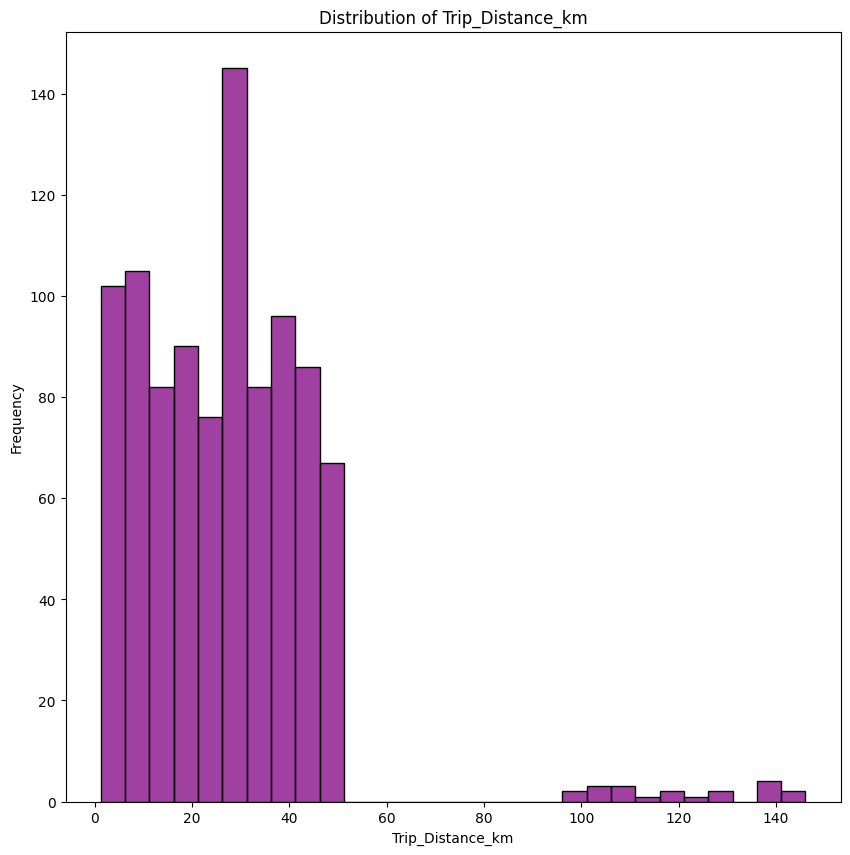

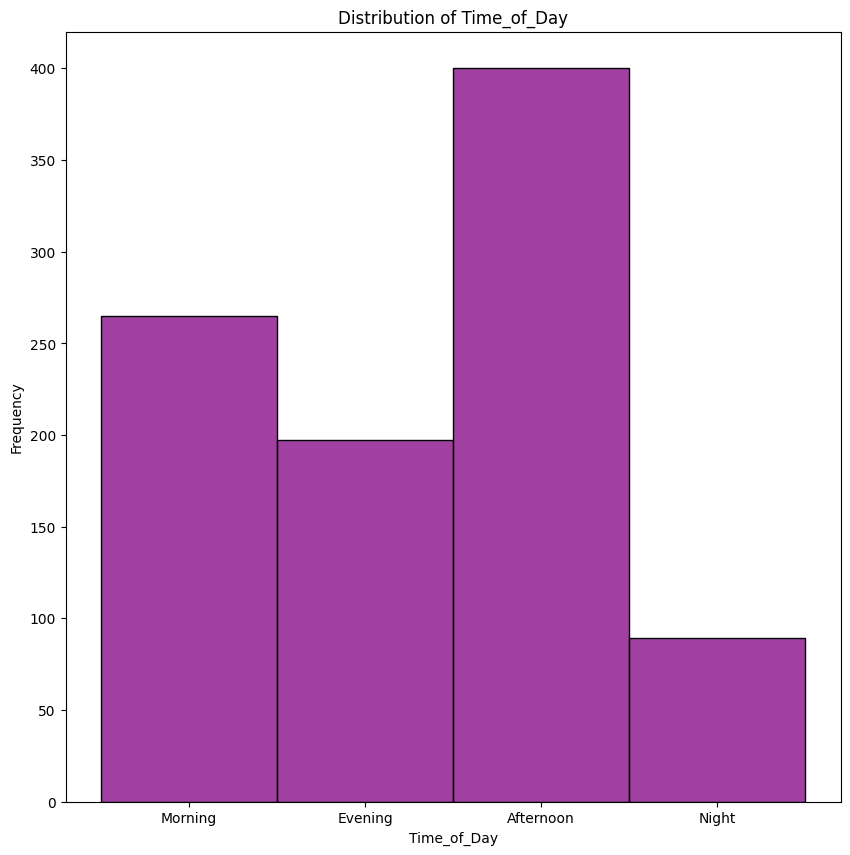

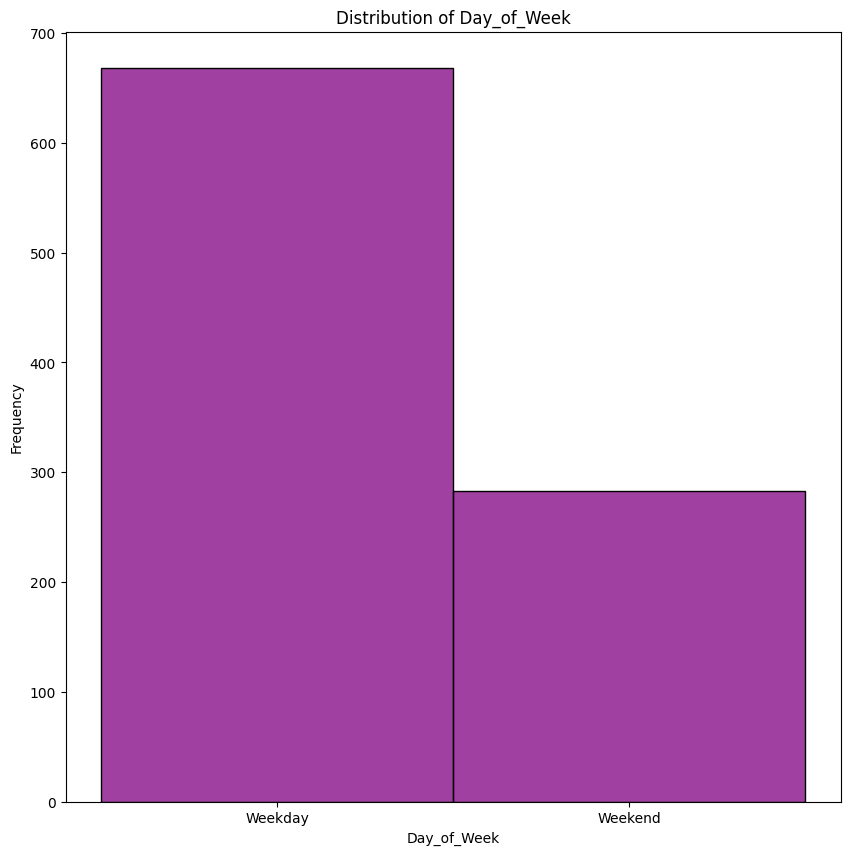

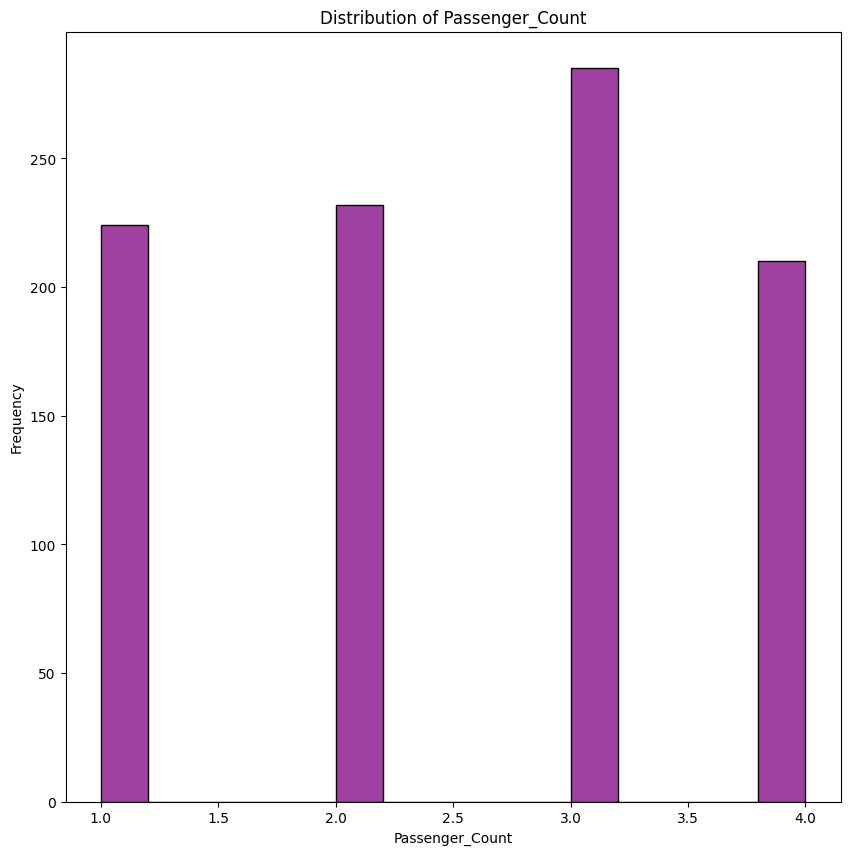

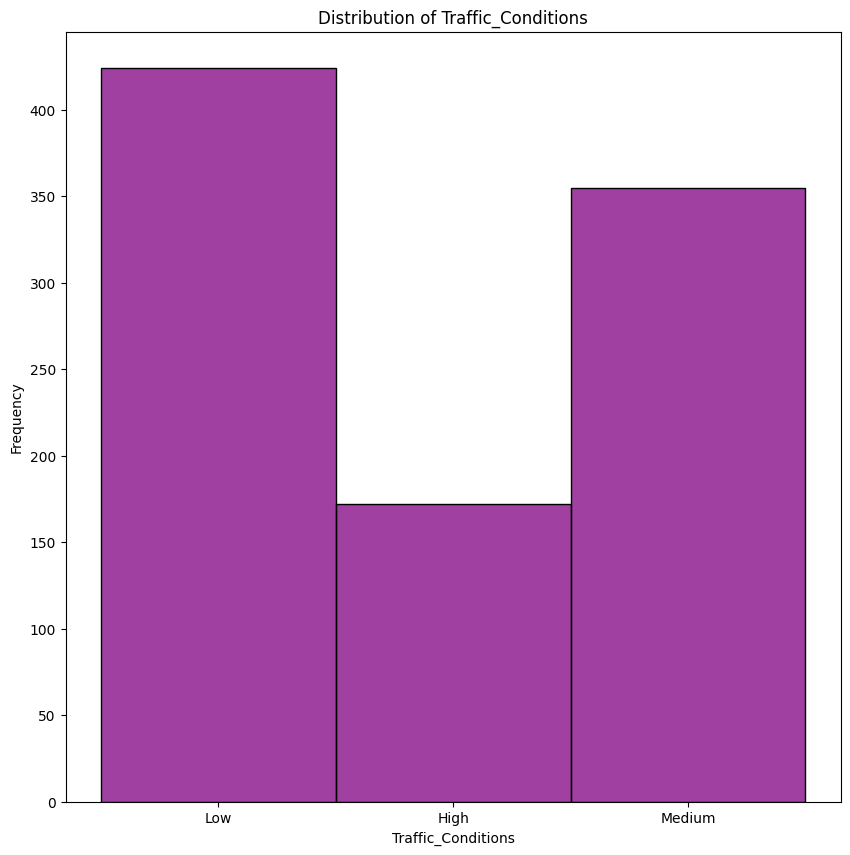

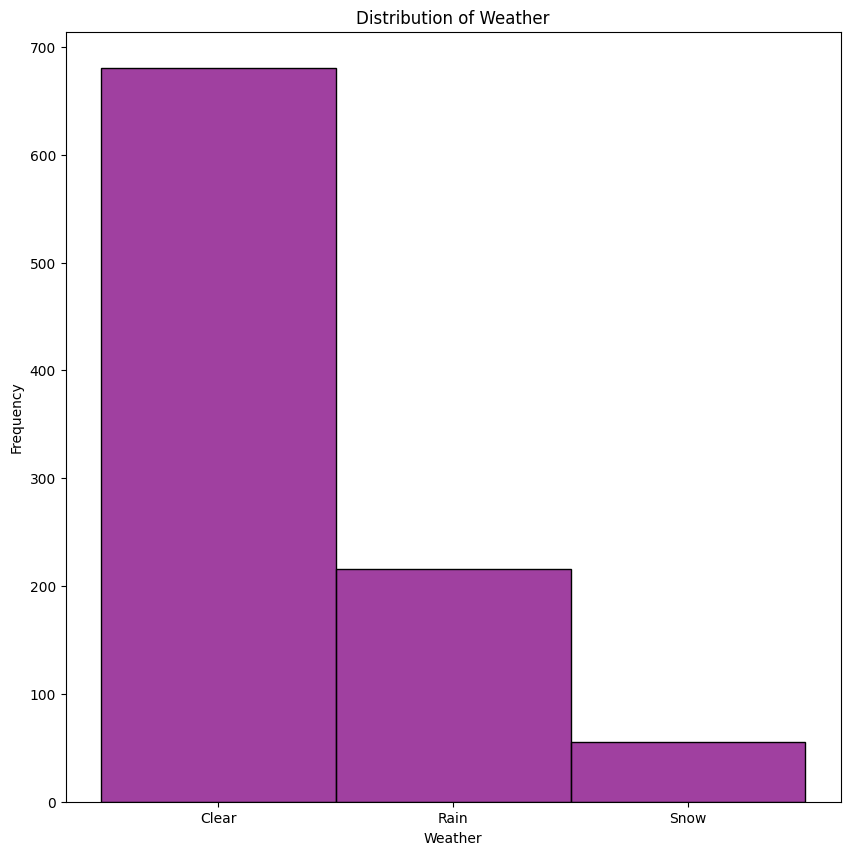

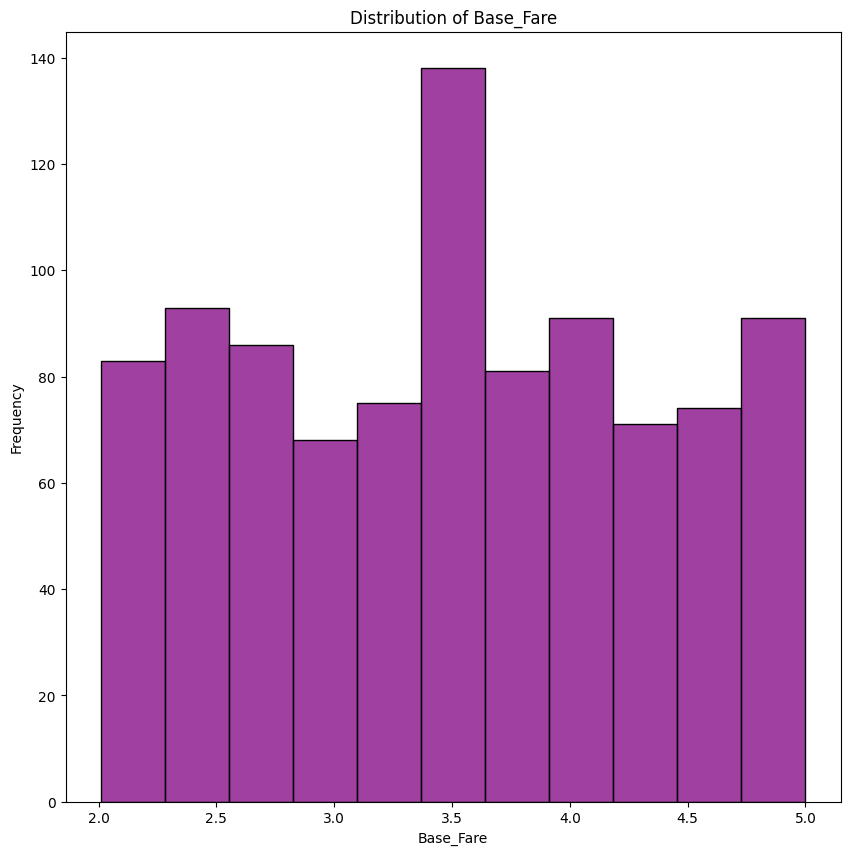

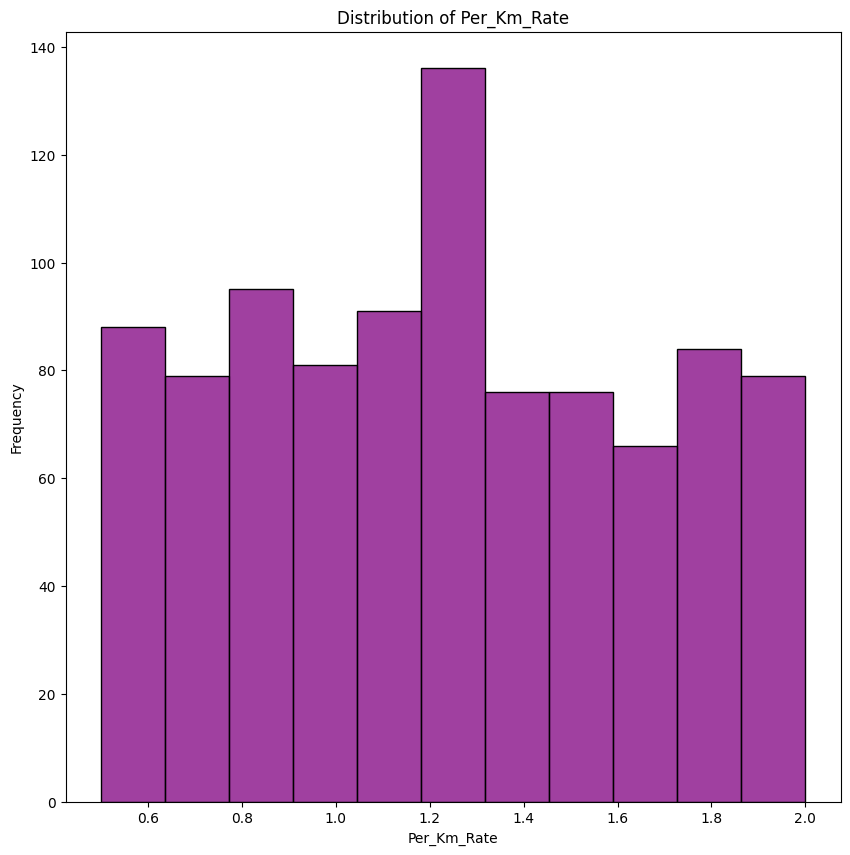

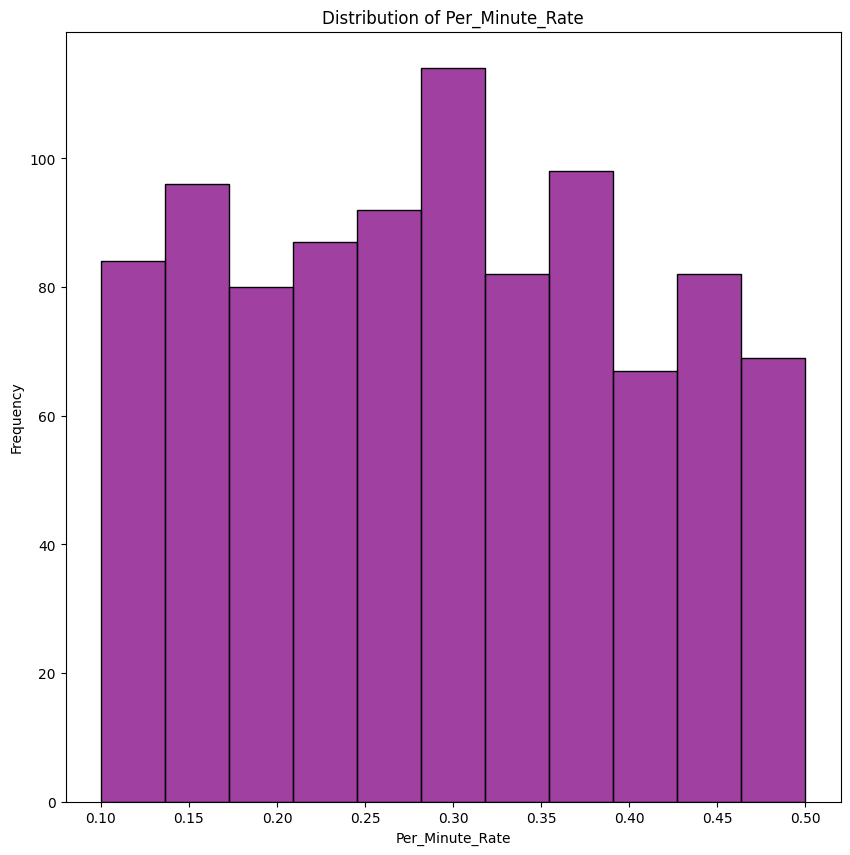

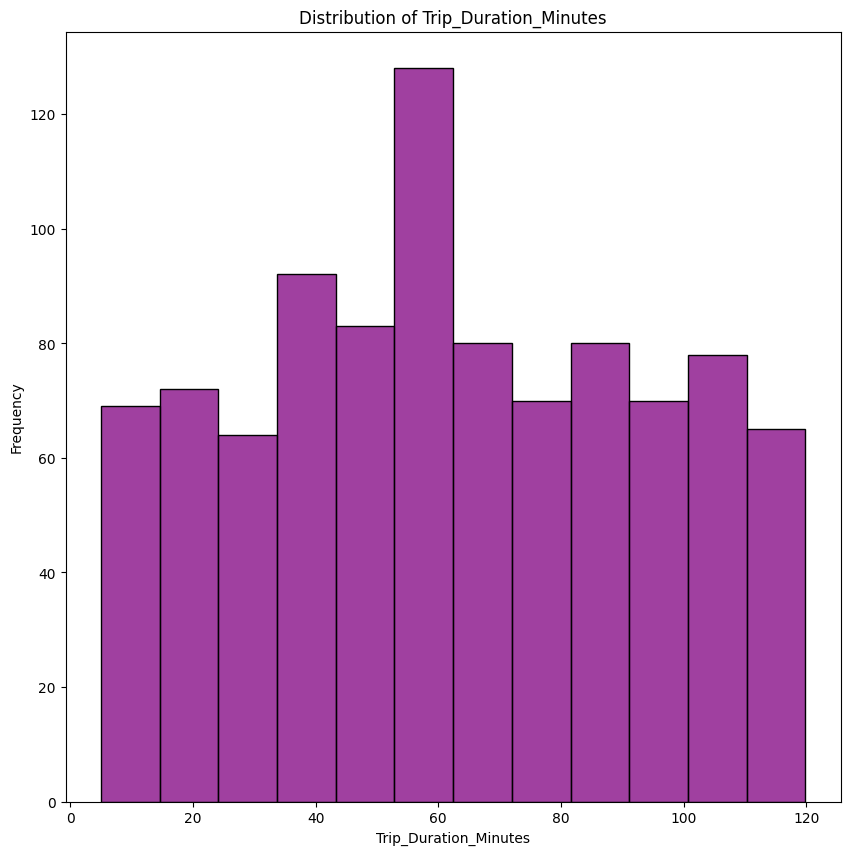

In [ ]:
for i in input:
  plt.figure(figsize=(10,10))
  sns.histplot(df[i],color='purple')
  plt.title(f"Distribution of {i}")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

In [ ]:
num = df.select_dtypes(include='number').columns
num

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

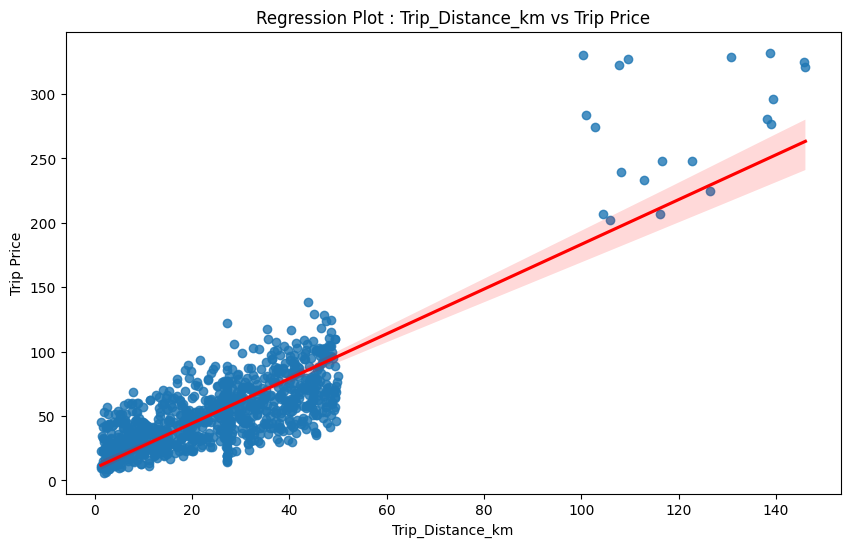

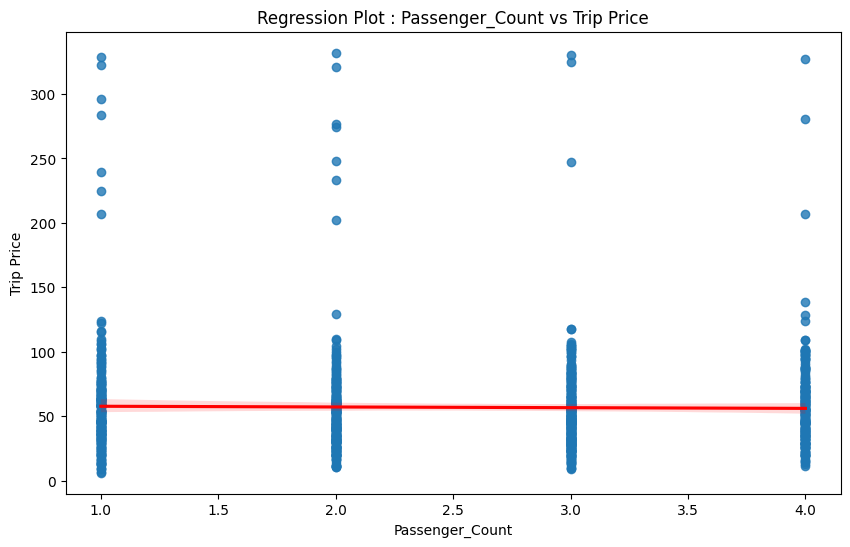

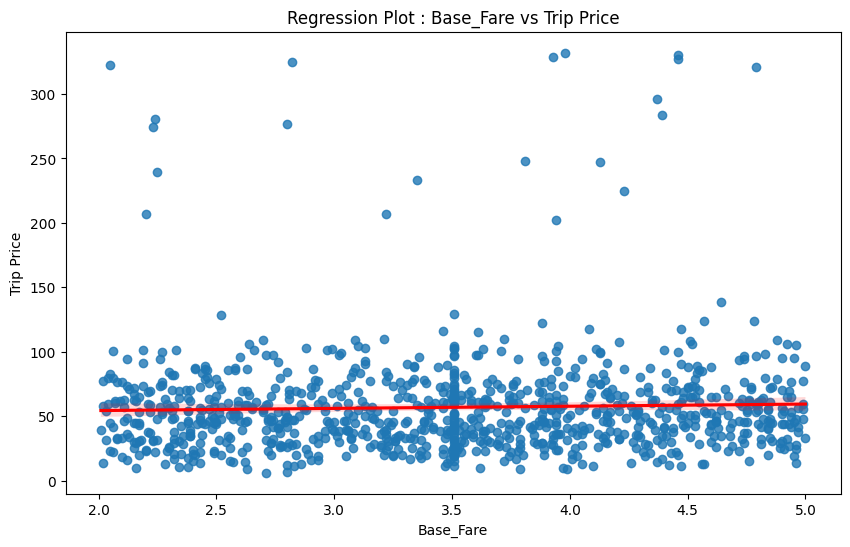

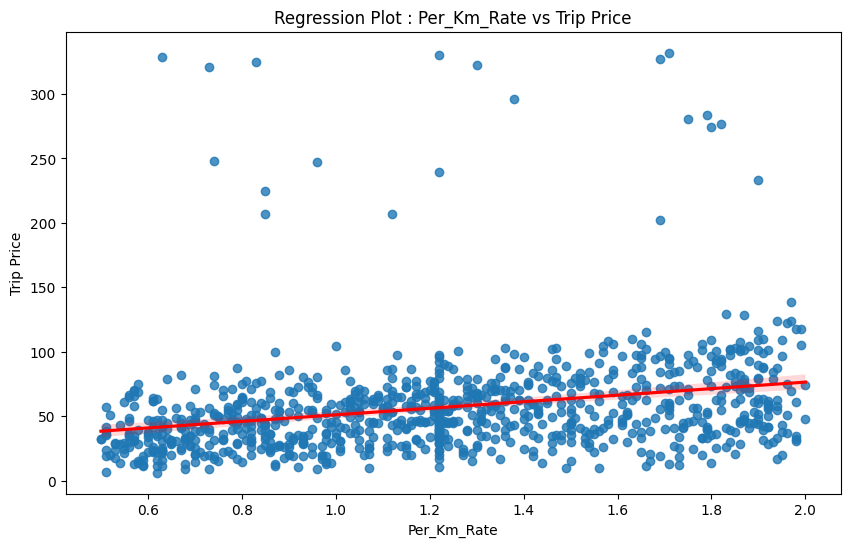

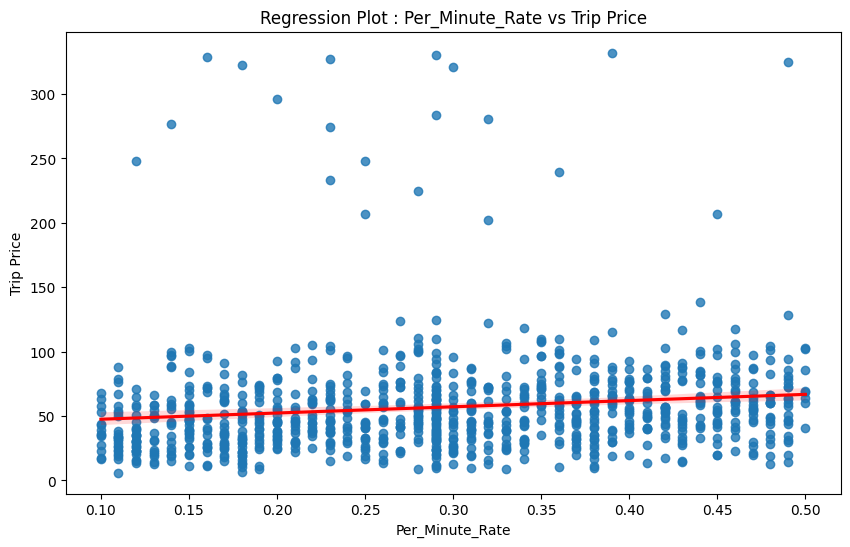

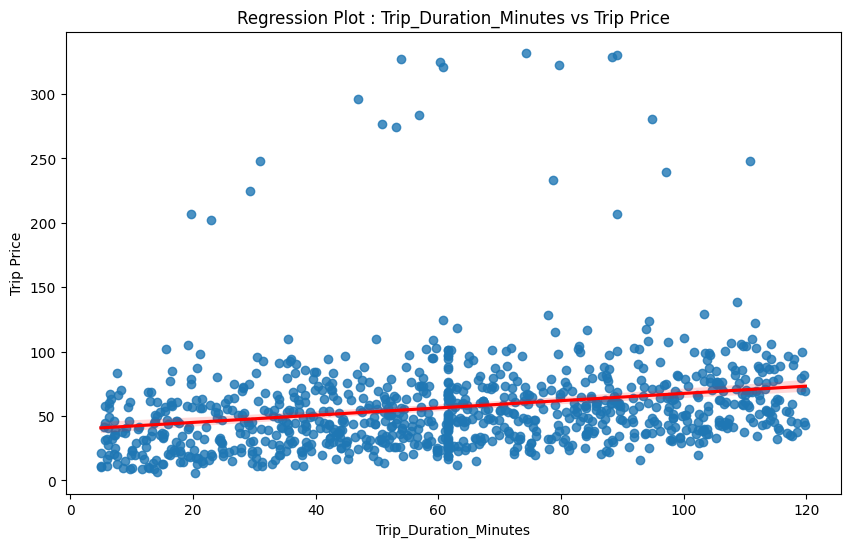

In [ ]:
for i in num:
  if i != 'Trip_Price':
    plt.figure(figsize=(10,6))
    sns.regplot(x=i,y='Trip_Price',data=df,line_kws={'color':'r'})
    plt.title(f"Regression Plot : {i} vs Trip Price")
    plt.xlabel(i)
    plt.ylabel('Trip Price')
    plt.show()

# Encoding

In [ ]:
# Encoding - OneHot Encoder
obj = df.select_dtypes(include='object').columns
obj

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

- I used one hot encoding instead of label encoding because label encoding assigns numerical values that implies an order of ranking which does not make sense for categorical variables like Time of day, Day of the week etc

- Also for tree based models like random forest and decision tree one hot encoding is the best choice.

In [ ]:
encoder = OneHotEncoder(drop='first',sparse_output=False) ## drop='first' avoids dummy variable trap
encoded_data=encoder.fit_transform(df[obj])

# Convert the encoded data to a DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(obj))

# Drop original categorical columns and append the encoded ones
df = df.drop(columns=obj).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.56,0.80,0.32,53.82,36.2624,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,36.870000,1.0,2.70,1.21,0.15,37.27,52.9032,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,30.330000,4.0,3.48,0.51,0.15,116.81,36.4698,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27.190998,3.0,2.93,0.63,0.32,22.64,15.6180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.640000,2.0,2.55,1.71,0.48,89.33,60.2028,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,5.490000,4.0,2.39,0.62,0.49,58.39,34.4049,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
947,45.950000,4.0,3.12,0.61,0.29,61.96,62.1295,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
948,7.700000,3.0,2.08,1.78,0.29,54.18,33.1236,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
949,47.560000,1.0,2.67,0.82,0.17,114.94,61.2090,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


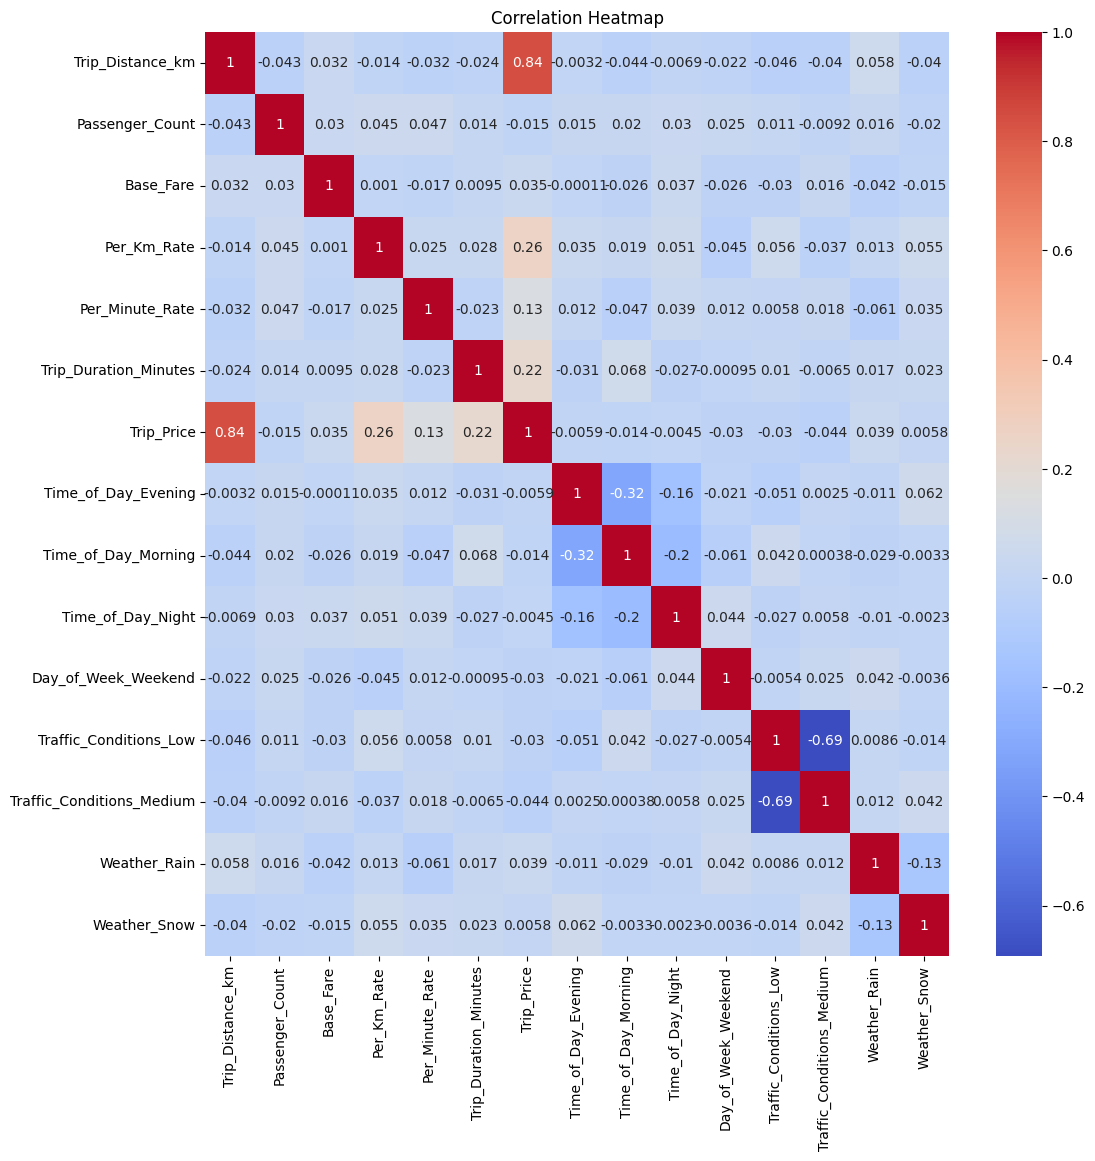

In [ ]:
#  used heatmap to show the correlation matrix between numerical features.
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
num_columns = df.select_dtypes(include='number').columns
num_columns

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Day_of_Week_Weekend', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow'],
      dtype='object')

# Outlier Detection

column :  {'Trip_Distance_km'}
Lower Bound : -23.919999999999998,Upper Bound : 74.88


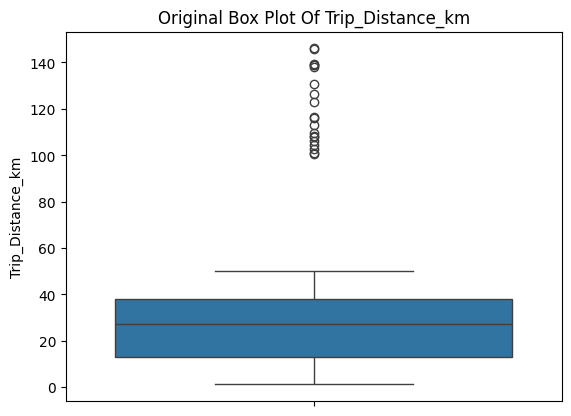

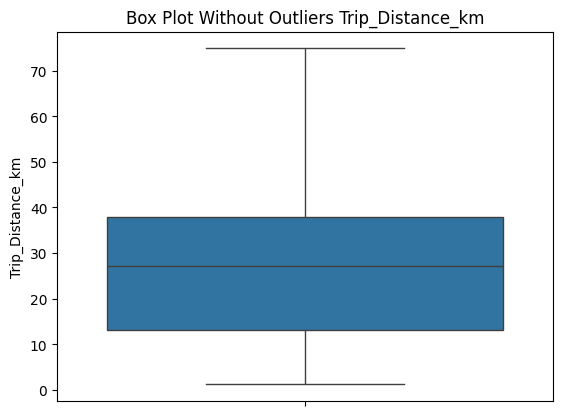

column :  {'Passenger_Count'}
Lower Bound : 0.5,Upper Bound : 4.5


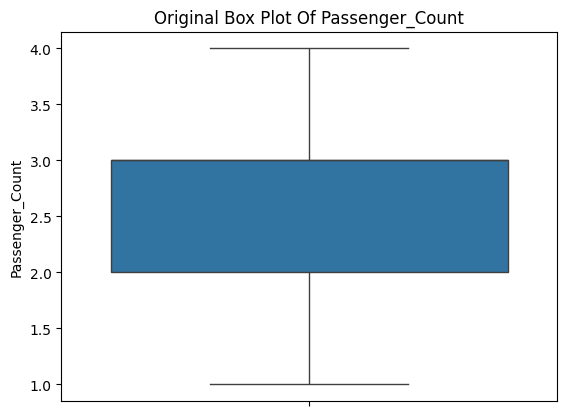

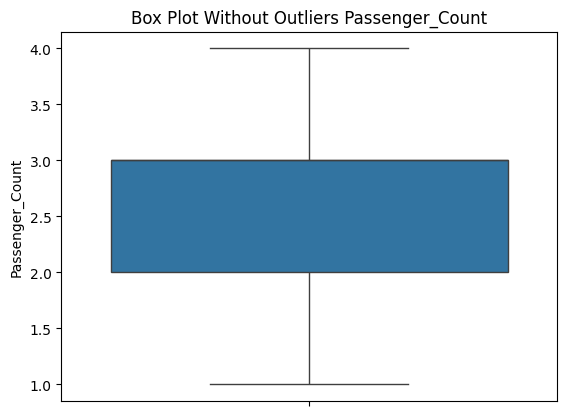

column :  {'Base_Fare'}
Lower Bound : 0.6574999999999993,Upper Bound : 6.2775


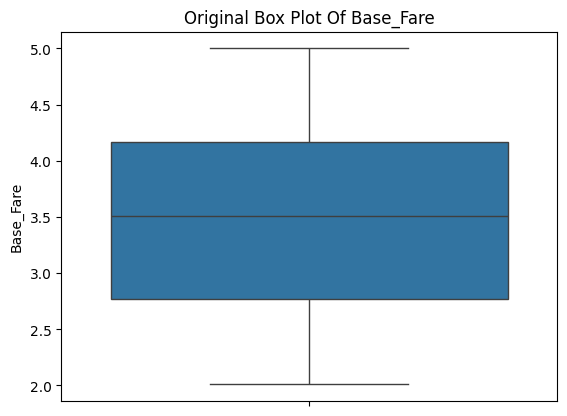

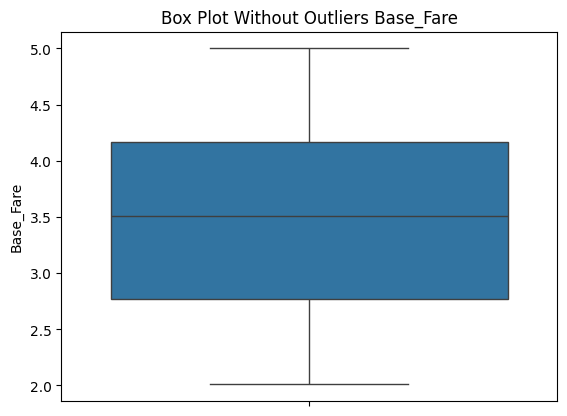

column :  {'Per_Km_Rate'}
Lower Bound : -0.19500000000000017,Upper Bound : 2.6450000000000005


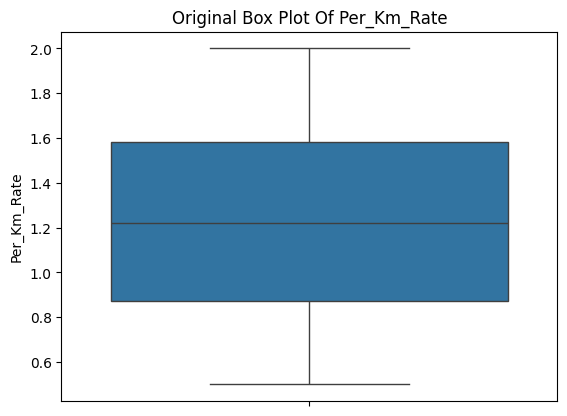

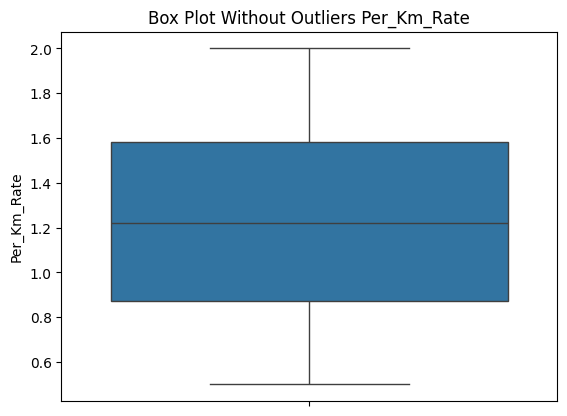

column :  {'Per_Minute_Rate'}
Lower Bound : -0.08500000000000002,Upper Bound : 0.675


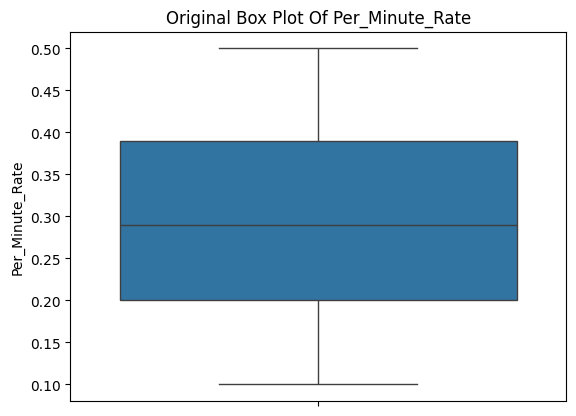

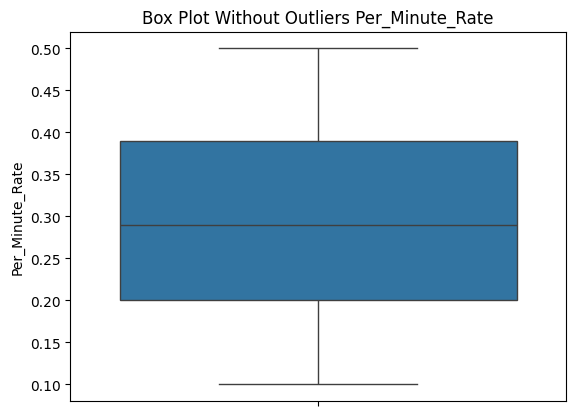

column :  {'Trip_Duration_Minutes'}
Lower Bound : -40.18750000000001,Upper Bound : 164.7125


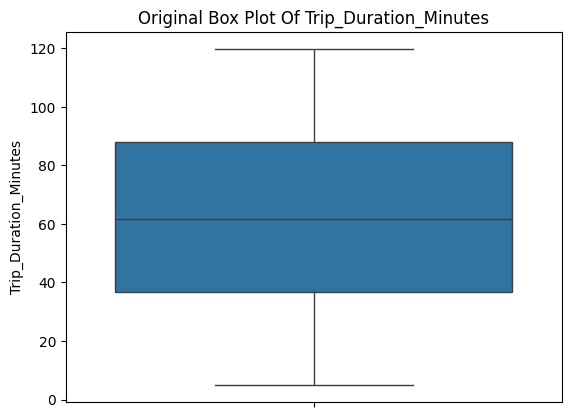

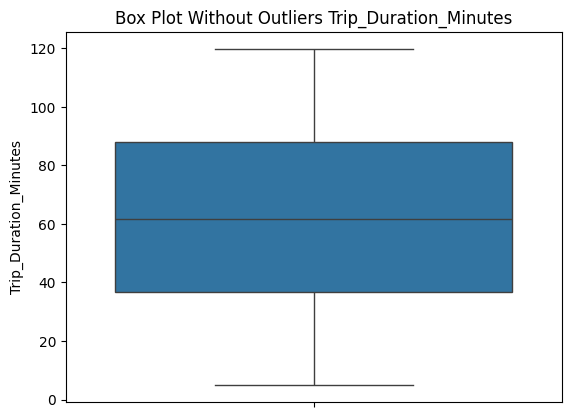

column :  {'Trip_Price'}
Lower Bound : -19.292400000000008,Upper Bound : 122.1344


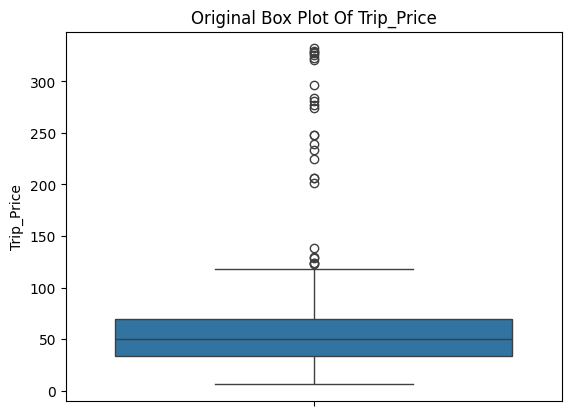

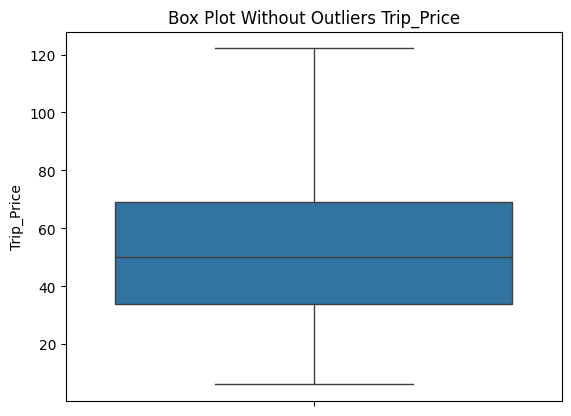

In [ ]:
def outliers_cleaning(clms):
  for column in clms:
    Q1 = np.percentile(df[column],25)
    Q3 = np.percentile(df[column],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"column : ",{column})
    print(f"Lower Bound : {lower_bound},Upper Bound : {upper_bound}")
    sns.boxplot(y=df[column])
    plt.title(f"Original Box Plot Of {column}")
    plt.show()

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    sns.boxplot(y=df[column])
    plt.title(f'Box Plot Without Outliers {column}')
    plt.show()

outliers_cleaning(num)

In [ ]:
# Feature Scaling => No need since its a regression problem
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:
# input.dtypes

In [ ]:
df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.56,0.80,0.32,53.82,36.2624,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,36.870000,1.0,2.70,1.21,0.15,37.27,52.9032,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,30.330000,4.0,3.48,0.51,0.15,116.81,36.4698,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27.190998,3.0,2.93,0.63,0.32,22.64,15.6180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.640000,2.0,2.55,1.71,0.48,89.33,60.2028,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Seperating x And y


In [ ]:
x=df.drop('Trip_Price',axis=1)
x

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.56,0.80,0.32,53.82,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,36.870000,1.0,2.70,1.21,0.15,37.27,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,30.330000,4.0,3.48,0.51,0.15,116.81,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27.190998,3.0,2.93,0.63,0.32,22.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.640000,2.0,2.55,1.71,0.48,89.33,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,5.490000,4.0,2.39,0.62,0.49,58.39,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
947,45.950000,4.0,3.12,0.61,0.29,61.96,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
948,7.700000,3.0,2.08,1.78,0.29,54.18,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
949,47.560000,1.0,2.67,0.82,0.17,114.94,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y=df['Trip_Price']
y

,Trip_Price
0,36.2624
1,52.9032
2,36.4698
3,15.6180
4,60.2028
...,...
946,34.4049
947,62.1295
948,33.1236
949,61.2090


In [ ]:
model = RandomForestRegressor()
model.fit(x,y)
importance = model.feature_importances_
importance

array([5.63495191e-01, 5.08046399e-03, 9.29594168e-03, 2.04717145e-01,
       7.51633847e-02, 1.32433538e-01, 1.83936268e-03, 1.13631029e-03,
       9.76544348e-04, 1.48678163e-03, 1.56763491e-03, 1.10006804e-03,
       1.20241642e-03, 5.05216857e-04])

In [ ]:
df.columns

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Day_of_Week_Weekend', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow'],
      dtype='object')

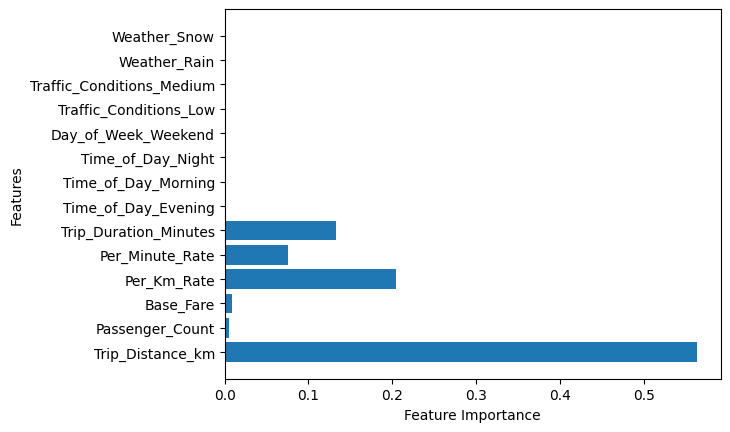

In [ ]:
# visualisation of the importance of each input feature
feature_names = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate','Per_Minute_Rate', 'Trip_Duration_Minutes',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night','Day_of_Week_Weekend', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow']
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Split the data into training and testing sets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
358,6.79,3.0,2.61,1.65,0.12,72.29,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
604,6.25,4.0,2.05,1.23,0.37,94.31,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
116,6.39,4.0,4.28,1.31,0.38,102.57,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,43.29,1.0,2.12,1.82,0.37,36.05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
48,47.04,4.0,4.83,1.38,0.36,79.54,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,33.29,3.0,4.48,1.10,0.19,52.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,8.92,3.0,3.69,1.07,0.36,42.14,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
629,30.68,1.0,2.75,1.44,0.27,93.45,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
559,4.72,1.0,4.28,1.48,0.48,50.89,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x_test

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
873,38.42,1.0,4.29,0.63,0.40,65.68,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
568,24.22,2.0,4.23,1.39,0.46,61.57,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
249,74.88,4.0,2.20,0.85,0.25,19.63,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
331,8.98,2.0,4.59,1.67,0.22,84.33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,49.38,1.0,3.64,1.03,0.28,9.47,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,20.64,3.0,3.30,0.93,0.11,99.33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
432,3.76,4.0,4.31,1.55,0.16,75.06,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
71,36.72,3.0,2.39,1.56,0.17,13.03,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
49,44.85,1.0,3.83,0.51,0.29,52.52,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
y_train

,Trip_Price
358,22.4883
604,44.6322
116,51.6275
76,94.2463
48,98.3796
...,...
835,50.9961
192,28.4048
629,72.1607
559,35.6928


In [ ]:
y_test

,Trip_Price
873,54.7666
568,86.3292
249,122.1344
331,38.1392
492,57.1530
...,...
748,33.4215
432,22.1476
71,61.8883
49,41.9343


# Model Creation

In [ ]:
# Linear Regression
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Decision Tree regression
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Random forest
model_forest = RandomForestRegressor()
model_forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_linear = model_linear.predict(x_test)
y_pred_linear

array([ 62.1383334 ,  64.86116994,  90.24260024,  44.81673488,
        62.70337631,  62.16761261,  46.95359446,  46.69577394,
        72.83848791,  61.0144679 ,  65.67613028,  23.66068473,
        25.5223019 ,  44.59969993, 101.23792495,  67.69633868,
        70.22889704,  56.36368539,  50.81946456,  43.67719225,
        55.94964784,  63.10001033,  28.68875683,  27.12526754,
        83.34141125,  71.98225466,  51.63032334,  40.59086473,
       127.4802417 ,  48.26561731,  51.15736983,  22.12045965,
        68.34047647,  20.2629205 ,  35.45511442,  37.46642448,
        80.17435641,  47.96313909,  63.78311581,  65.78345103,
        93.43262475,  84.48767891,  21.39678541,  29.22164705,
        56.79231218,  83.35729766,  37.49337035,  60.35624397,
        55.27283136,  60.06525089,   8.1039543 ,  51.6492127 ,
        50.11054275,  77.18758176,  26.90471162,  62.11746694,
        30.77185861,  34.26077753, 100.32303018,  48.37332404,
        54.53044788,  43.57748397,  77.95830522,  94.27

In [ ]:
y_pred_tree = model_tree.predict(x_test)
y_pred_tree

array([ 40.2799,  45.8161, 122.1344,  39.1789,  83.6965,  66.581 ,
        44.7548,  36.4388,  81.9816,  63.866 ,  71.2142,  25.4565,
        19.9744,  57.1264, 102.4302,  74.5998,  64.0553,  64.9824,
        58.6555,  37.2489,  59.475 ,  46.1526,  20.0083,  31.8296,
        74.5998,  72.8683,  51.03  ,  20.0083, 122.1344,  64.0787,
        56.3682,  17.6621,  51.031 ,  22.0141,  45.6194,  38.0988,
        77.4039,  48.0066,  46.9056,  37.17  , 101.9914, 101.5506,
        28.0701,  45.6194,  95.9602,  88.1462,  35.964 ,  59.475 ,
        41.699 ,  45.8161,  20.2164,  40.65  ,  54.4237,  63.3579,
        24.2608,  63.3579,  26.9202,  25.6218, 104.2421,  69.6575,
        50.9961,  38.6058,  73.215 ,  88.1462,  47.4882,  64.9824,
        52.5934,  41.0174, 104.2421,  54.6247,  67.2293,  41.2036,
        38.6058,  79.6245,  24.2608,  49.7873,  62.1095,  59.7613,
        19.9744,  22.8002,  41.0174,  70.745 , 122.1344,  38.035 ,
        15.0994,  70.745 ,  46.3014,  25.6218,  38.6058,  29.7

In [ ]:
y_pred_forest = model_forest.predict(x_test)
y_pred_forest

array([ 47.399501,  59.098767, 115.23793 ,  34.514587,  60.019064,
        57.291675,  50.053942,  41.078981,  65.253827,  54.558885,
        67.605568,  25.476374,  19.284045,  45.86483 , 109.076614,
        67.480497,  71.512717,  57.919057,  50.304888,  36.975787,
        60.012054,  70.437445,  19.381632,  32.229395,  76.495461,
        65.294281,  45.677438,  21.246152, 119.725835,  59.792847,
        41.850423,  24.429499,  60.666892,  27.806728,  38.443006,
        33.946971,  77.736414,  45.981074,  53.257008,  60.711768,
        92.955657,  98.727215,  23.176355,  33.831642,  62.492187,
        77.271387,  38.588404,  60.360519,  43.308018,  54.14822 ,
        15.896972,  41.26246 ,  46.095152,  62.628084,  26.369199,
        49.144457,  27.67893 ,  32.008737, 103.364724,  62.266726,
        54.357277,  40.950465,  73.231998,  86.618743,  58.432117,
        58.762764,  45.847645,  34.706516, 104.206072,  45.914327,
        67.348287,  45.59308 ,  43.126629,  73.790922,  32.181

# Visualisation Actual vs Predicted Values

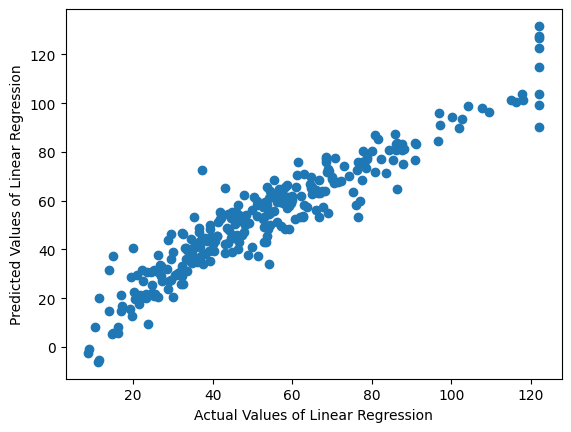

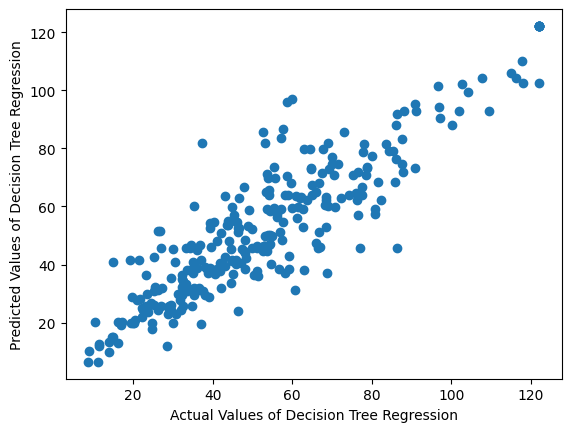

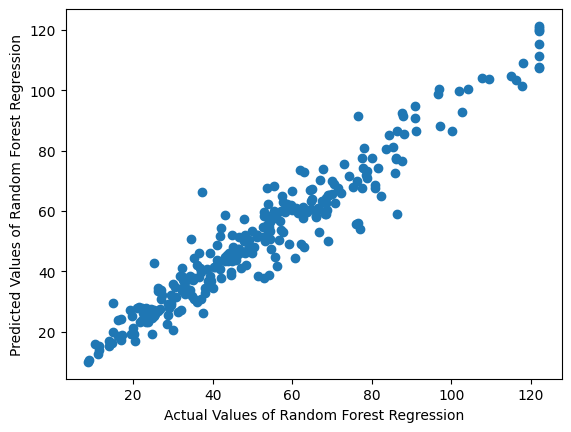

In [ ]:
model_name = ["Linear Regression","Decision Tree Regression","Random Forest Regression"]
predicted = [y_pred_linear,y_pred_tree,y_pred_forest]
for i,j in zip(model_name,predicted):
  plt.scatter(y_test,j)
  plt.xlabel(f"Actual Values of {i}")
  plt.ylabel(f"Predicted Values of {i}")
  plt.show()

# Performance Evaluation

In [ ]:
for i,j in zip(model_name,predicted):
  print("Model is ",i)
  print("MAE = ",mean_absolute_error(y_test,j))
  print("MAPE = ",mean_absolute_percentage_error(y_test,j))
  print("MSE = ",mean_squared_error(y_test,j))
  print("RMSE = ",root_mean_squared_error(y_test,j))
  print("R2_Score = ",r2_score(y_test,j))
  print("*"*100)

Model is  Linear Regression
MAE =  6.562216336160066
MAPE =  0.16800267142241967
MSE =  73.16086215185854
RMSE =  8.553412310409135
R2_Score =  0.8889326997914986
****************************************************************************************************
Model is  Decision Tree Regression
MAE =  8.485687412587412
MAPE =  0.1892667655558635
MSE =  135.24186383965036
RMSE =  11.629353543497178
R2_Score =  0.7946860076545157
****************************************************************************************************
Model is  Random Forest Regression
MAE =  5.132096020979011
MAPE =  0.11324687904239875
MSE =  50.123575327840754
RMSE =  7.07980051469254
R2_Score =  0.9239061702566432
****************************************************************************************************


# Conclusion

- This project successfully developed a machine learning model to predict taxi trip prices with high accuracy.
- The **Random Forest model** outperformed other models, making it the most reliable choice for fare estimation.

In [ ]:
# Perform hyper parameter tuning for decision tree regression model
# new_model_tree = DecisionTreeRegressor()
# param = {'max_depth':[3,5,10],
#          'min_samples_split':[2,5,10],
#          'min_samples_leaf':[1,2,4],
#          'max_features':['auto','sqrt','log2']}

# dt = GridSearchCV(estimator=new_model_tree,
#                   param_grid=param,
#                   scoring='neg_root_mean_squared_error',
#                   cv=5,
#                   verbose=1,
#                   n_jobs=1)
# dt.fit(x_train,y_train)
# best_params = dt.best_params_
# print("Best Hyperparameters:", best_params)

In [ ]:
# best_model = dt.best_estimator_
# y_pred = best_model.predict(x_test)

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R2 Score: {r2}")

In [ ]:
# # Perform hyper parameter tuning for decision tree regression model

# # Define the model
# model = DecisionTreeRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Retrieve the best parameters and score
# best_params = grid_search.best_params_
# best_score = np.sqrt(-grid_search.best_score_)  # Convert negative MSE to RMSE

# print("Best Parameters:", best_params)
# print("Best RMSE:", best_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best RMSE: 10.516626424825827


In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error

# # Initialize the model with the best parameters
# best_model = DecisionTreeRegressor(
#     max_depth=None,
#     max_features=None,
#     min_samples_leaf=4,
#     min_samples_split=2,
#     random_state=0
# )

# # Fit the model to the training data
# best_model.fit(x_train, y_train)

# # Predict on the test data
# y_pred = best_model.predict(x_test)

# # Evaluate the model
# rmse = root_mean_squared_error(y_test, y_pred)
# print("Root Mean Squared Error (RMSE) on test data:", rmse)
# print("R2_score after hyper parameter tuning = ",r2_score(y_test,y_pred))

Root Mean Squared Error (RMSE) on test data: 9.706379107436524
R2_score after hyper parameter tuning =  0.8569717252206427
